# Face detection and recognition from images using Python. 

**The final project for Data Science bootcamp (Kodołamacz) organized by Sages.**

**Author: Arkadiusz Stadnicki**

#### Table of contents:

1. Introduction

2. Libraries

3. Face detection methods

4. Images for project

5. Face detection code (HoG Face Detector – success!)

6. Face recognition code – picture no 1 (HoG Face Detector – success!)

7. Face recognition code – picture no 2 (HoG Face Detector – failure!)

8. Face recognition code – picture no 2 (CNN based Face Detector – success!)

9. Face recognition using Fisherface Method with Haar cascade Detector (prediction - success!)

10. Summary

11. References


## 1.Introduction

**The main goal of the project is to detect and recognize faces of Presidents of the United States in a picture.
Comparison of following face detectors: HoG, CNN and Haar Cascade.** 

**Face detection is an artificial intelligence (AI) based computer technology used to find and identify human faces in digital images.**

Face detection technology can be applied to various fields - including security, biometrics, law enforcement, entertainment and personal safety - to provide surveillance and tracking of people in real time.

In order to work, face detection applications use machine learning and formulas known as algorithms to detecting human faces within images. These images might contain numerous objects that aren’t faces such as landscapes, buildings and other parts of humans (e.g. legs, shoulders and arms).

**Although the terms face detection and face recognition are often used together, face detection is a broader term than face recognition.** Face detection means that a system is able to identify that there is a human face present in an image or video. 

**Face recognition describes a biometric technology that goes way beyond recognizing when a human face is present. It actually attempts to establish whose face it is.** 

Face recognition is used for unlocking phones and mobile apps as well as for Biometric verification. The banking, retail, airports and other transportation-security industries employ facial recognition to reduce crime and prevent violence.

In short, while all face recognition systems use face detection, not all face detection systems have a face recognition component.

## 2.Libraries

I use following libraries for my project:

* **OpenCV** is an open-source and the most popular library for computer vision. OpenCV uses machine learning algorithms to search for faces within a picture.
* **CMake** (Cross Platform Make) is an open-source, cross-platform library for building software using a compiler-independent method.
* **Dlib** library is a C++ toolkit containing machine learning algorithms and tools (that’s why we need the CMake to be installed – to compile Dlib). I use Dlib for face detection.
* **Face Recognition** Library - recognize faces from Python or from the command line.
* **NumPy** - offers comprehensive mathematical functions, random number generators, linear algebra routines, and more.


## 3.Face detection methods

In this project I use these popular types of **Face Detectors**: 
* **HoG** Face Detector,
* **CNN** based Face Detector,
* **Haar Cascade**.

**HoG Face Detector – (Histogram of Oriented Gradients)** is generally used for object detection. The advantage of this detector is that it works faster while using in CPU. The disadvantage is the picture should be almost front-faced, doesn’t work for side face or non-frontal faces, like looking down or up. 

**CNN based Face Detector** – advanced face detector. It uses Convolutional Neural Network based Deep Learning procedure. The advantage is that it detects multiple face orientations. The disadvantage is that it is very slow on CPU.

**Haar Cascades** - OpenCV’s most popular object detection algorithm. Many algorithms are more accurate than Haar cascades, but they are still relevant and useful today. One of the primary benefits of Haar cascades is that they are very fast. 

## 4.Images for project

**In this project I use pictures of Presidents of the United States: Joe Biden, Donald Trump, Barack Obama and George W. Bush.**

Sources of pictures:

* Official portrait of President Joe Biden / Adam Schultz, https://www.loc.gov/item/2021630112/.

* Portrait of President-elect Donald Trump, https://www.loc.gov/item/2017645723/.

* Official portrait of President-elect Barack Obama / Pete Souza, https://www.loc.gov/item/2010647151/.

* Official portrait of President George W. Bush / Eric Draper, https://www.loc.gov/item/2011645073/.

* Picture no 1 of both Presidents: Trump and Obama – The Economic Times 
https://economictimes.indiatimes.com/news/international/world-news/if-donald-trump-succeeds-the-country-succeeds-barack-obama/articleshow/55362146.cms

* Picture no 2 of both Presidents: Trump and Obama – The Federalist 
https://thefederalist.com/2017/02/14/presidents-trump-obama-clothes-make-man

* In a Chapter 9: "Face recognition using Fisherface Method with Haar cascade Detector (prediction - success!)" - I use 10 pictures of President Joe Biden and 10 pictures of President George W. Bush - randomly found on the Internet. 

## 5.Face detection code (HoG Face Detector – success!)

### Picture no 1 of both Presidents: Trump and Obama:
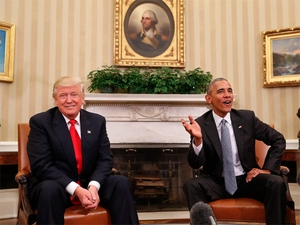

In [13]:
#importing the required libraries
import cv2
import face_recognition

#cv2.imshow() Not Responding Issue Fix
%matplotlib auto

#loading the image to detect
image_to_detect = cv2.imread('Bootcamp final project/images/trump_obama_1.jpg')

#detect all faces in the image
#arguments are image,no_of_times_to_upsample, model
all_face_locations = face_recognition.face_locations(image_to_detect,model='hog')

#print the number of faces detected
print('There are {} no of faces in this image'.format(len(all_face_locations)))

#looping through the face locations
for index,current_face_location in enumerate(all_face_locations):
    #splitting the tuple to get the four position values of current face
    top_pos,right_pos,bottom_pos,left_pos = current_face_location
    #printing the location of current face
    print('Found face {} at top:{},right:{},bottom:{},left:{}'.format(index+1,top_pos,right_pos,bottom_pos,left_pos))
    #slicing the current face from main image
    current_face_image = image_to_detect[top_pos:bottom_pos,left_pos:right_pos]
    #showing the current face with dynamic title
    cv2.imshow("Face no "+str(index+1),current_face_image)

Using matplotlib backend: Qt5Agg
There are 2 no of faces in this image
Found face 1 at top:74,right:245,bottom:110,left:209
Found face 2 at top:82,right:85,bottom:118,left:49


### Result: 
**Face no 1:** 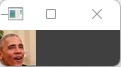

**Face no 2:** 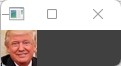

## 6.Face recognition code – picture no 1 (HoG Face Detector – success!)

### Picture no 1 of both Presidents: Trump and Obama:
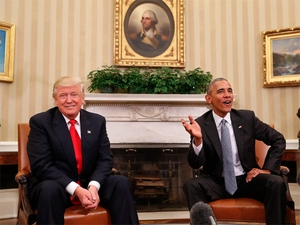

### Portrait of President-elect Donald Trump:
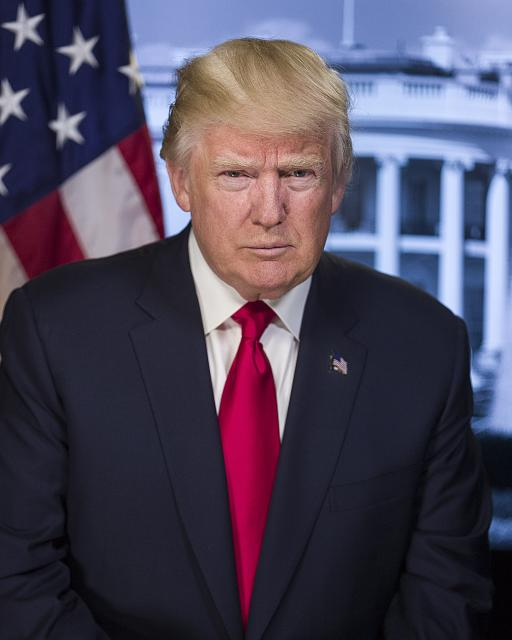

### Portrait of President-elect Barack Obama:
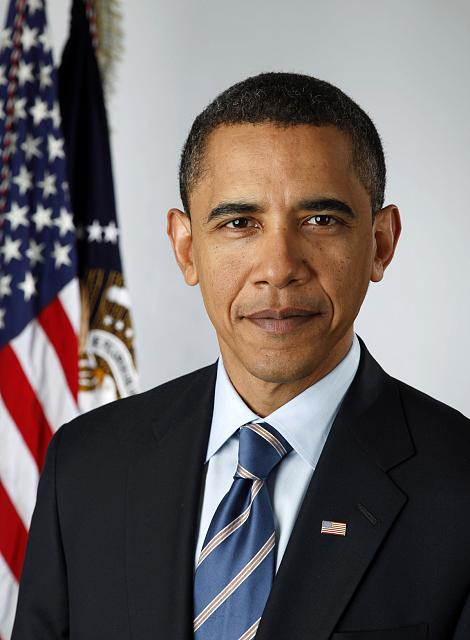

In [14]:
#importing the required libraries
import cv2
import face_recognition

#cv2.imshow() Not Responding Issue Fix
%matplotlib auto

#loading the image to detect
original_image = cv2.imread('Bootcamp final project/images/trump_obama_1.jpg')

#load the sample images and get the 128 face embeddings from them
obama_image = face_recognition.load_image_file('Bootcamp final project/images/Obama.jpg')
obama_face_encodings = face_recognition.face_encodings(obama_image)[0]

trump_image = face_recognition.load_image_file('Bootcamp final project/images/Trump.jpg')
trump_face_encodings = face_recognition.face_encodings(trump_image)[0]

#save the encodings and the corresponding labels in seperate arrays in the same order
known_face_encodings = [obama_face_encodings, trump_face_encodings]
known_face_names = ["Obama", "Trump"]

#load the unknown image to recognize faces in it
image_to_recognize = face_recognition.load_image_file('Bootcamp final project/images/trump_obama_1.jpg')

#detect all faces in the image
#arguments are image,no_of_times_to_upsample, model
all_face_locations = face_recognition.face_locations(image_to_recognize,model='hog')
#detect face encodings for all the faces detected
all_face_encodings = face_recognition.face_encodings(image_to_recognize,all_face_locations)

#print the number of faces detected
print('There are {} no of faces in this image'.format(len(all_face_locations)))

#looping through the face locations and the face embeddings
for current_face_location,current_face_encoding in zip(all_face_locations,all_face_encodings):
    #splitting the tuple to get the four position values of current face
    top_pos,right_pos,bottom_pos,left_pos = current_face_location
    
    
    #find all the matches and get the list of matches
    all_matches = face_recognition.compare_faces(known_face_encodings, current_face_encoding)
   
    #string to hold the label
    name_of_person = 'Unknown face'
    
    #check if the all_matches have at least one item
    #if yes, get the index number of face that is located in the first index of all_matches
    #get the name corresponding to the index number and save it in name_of_person
    if True in all_matches:
        first_match_index = all_matches.index(True)
        name_of_person = known_face_names[first_match_index]
    
    #draw rectangle around the face    
    cv2.rectangle(original_image,(left_pos,top_pos),(right_pos,bottom_pos),(255,0,0),2)
    
    #display the name as text in the image
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(original_image, name_of_person, (left_pos,bottom_pos), font, 0.5, (255,255,255),1)
    
    #display the image
    cv2.imshow("Faces Identified",original_image)

Using matplotlib backend: Qt5Agg
There are 2 no of faces in this image


### Result:
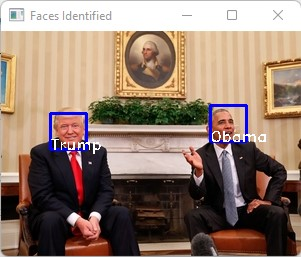

## 7.Face recognition code – picture no 2 (HoG Face Detector – failure!)

### Picture no 2 of both Presidents: Trump and Obama: 
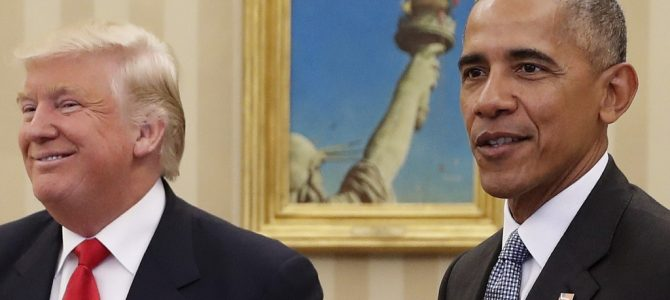

In [15]:
#importing the required libraries
import cv2
import face_recognition

#cv2.imshow() Not Responding Issue Fix
%matplotlib auto

#loading the image to detect
original_image = cv2.imread('Bootcamp final project/images/trump_obama_2.jpg')

#load the sample images and get the 128 face embeddings from them
obama_image = face_recognition.load_image_file('Bootcamp final project/images/Obama.jpg')
obama_face_encodings = face_recognition.face_encodings(obama_image)[0]

trump_image = face_recognition.load_image_file('Bootcamp final project/images/Trump.jpg')
trump_face_encodings = face_recognition.face_encodings(trump_image)[0]

#save the encodings and the corresponding labels in seperate arrays in the same order
known_face_encodings = [obama_face_encodings, trump_face_encodings]
known_face_names = ["Obama", "Trump"]

#load the unknown image to recognize faces in it
image_to_recognize = face_recognition.load_image_file('Bootcamp final project/images/trump_obama_2.jpg')

#detect all faces in the image
#arguments are image,no_of_times_to_upsample, model
all_face_locations = face_recognition.face_locations(image_to_recognize,model='hog')
#detect face encodings for all the faces detected
all_face_encodings = face_recognition.face_encodings(image_to_recognize,all_face_locations)

#print the number of faces detected
print('There are {} no of faces in this image'.format(len(all_face_locations)))

#looping through the face locations and the face embeddings
for current_face_location,current_face_encoding in zip(all_face_locations,all_face_encodings):
    #splitting the tuple to get the four position values of current face
    top_pos,right_pos,bottom_pos,left_pos = current_face_location
    
    
    #find all the matches and get the list of matches
    all_matches = face_recognition.compare_faces(known_face_encodings, current_face_encoding)
   
    #string to hold the label
    name_of_person = 'Unknown face'
    
    #check if the all_matches have at least one item
    #if yes, get the index number of face that is located in the first index of all_matches
    #get the name corresponding to the index number and save it in name_of_person
    if True in all_matches:
        first_match_index = all_matches.index(True)
        name_of_person = known_face_names[first_match_index]
    
    #draw rectangle around the face    
    cv2.rectangle(original_image,(left_pos,top_pos),(right_pos,bottom_pos),(255,0,0),2)
    
    #display the name as text in the image
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(original_image, name_of_person, (left_pos,bottom_pos), font, 0.5, (255,255,255),1)
    
    #display the image
    cv2.imshow("Faces Identified",original_image)

Using matplotlib backend: Qt5Agg
There are 1 no of faces in this image


### Result: 
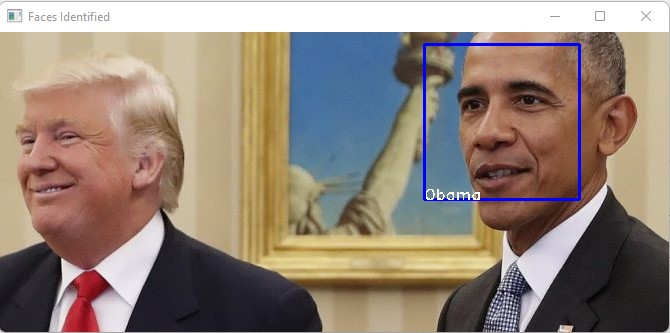

### As we can see, only 1 face is detected and recognized. HoG Face Detector failed. We need to use more advanced detector - CNN based Face Detector. 

## 8.Face recognition code – picture no 2 (CNN based Face Detector – success!)

### Picture no 2 of both Presidents: Trump and Obama: 
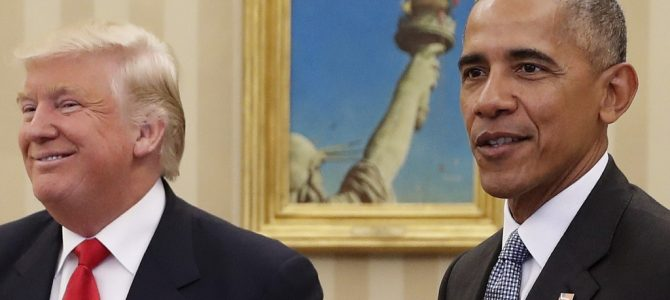

In [16]:
#importing the required libraries
import cv2
import face_recognition

#cv2.imshow() Not Responding Issue Fix
%matplotlib auto

#loading the image to detect
original_image = cv2.imread('Bootcamp final project/images/trump_obama_2.jpg')

#load the sample images and get the 128 face embeddings from them
obama_image = face_recognition.load_image_file('Bootcamp final project/images/Obama.jpg')
obama_face_encodings = face_recognition.face_encodings(obama_image)[0]

trump_image = face_recognition.load_image_file('Bootcamp final project/images/Trump.jpg')
trump_face_encodings = face_recognition.face_encodings(trump_image)[0]

#save the encodings and the corresponding labels in seperate arrays in the same order
known_face_encodings = [obama_face_encodings, trump_face_encodings]
known_face_names = ["Obama", "Trump"]

#load the unknown image to recognize faces in it
image_to_recognize = face_recognition.load_image_file('Bootcamp final project/images/trump_obama_2.jpg')

#detect all faces in the image
#arguments are image,no_of_times_to_upsample, model
all_face_locations = face_recognition.face_locations(image_to_recognize,model='cnn')
#detect face encodings for all the faces detected
all_face_encodings = face_recognition.face_encodings(image_to_recognize,all_face_locations)

#print the number of faces detected
print('There are {} no of faces in this image'.format(len(all_face_locations)))

#looping through the face locations and the face embeddings
for current_face_location,current_face_encoding in zip(all_face_locations,all_face_encodings):
    #splitting the tuple to get the four position values of current face
    top_pos,right_pos,bottom_pos,left_pos = current_face_location
    
    
    #find all the matches and get the list of matches
    all_matches = face_recognition.compare_faces(known_face_encodings, current_face_encoding)
   
    #string to hold the label
    name_of_person = 'Unknown face'
    
    #check if the all_matches have at least one item
    #if yes, get the index number of face that is located in the first index of all_matches
    #get the name corresponding to the index number and save it in name_of_person
    if True in all_matches:
        first_match_index = all_matches.index(True)
        name_of_person = known_face_names[first_match_index]
    
    #draw rectangle around the face    
    cv2.rectangle(original_image,(left_pos,top_pos),(right_pos,bottom_pos),(255,0,0),2)
    
    #display the name as text in the image
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(original_image, name_of_person, (left_pos,bottom_pos), font, 0.5, (255,255,255),1)
    
    #display the image
    cv2.imshow("Faces Identified",original_image)

Using matplotlib backend: Qt5Agg
There are 2 no of faces in this image


### Result:
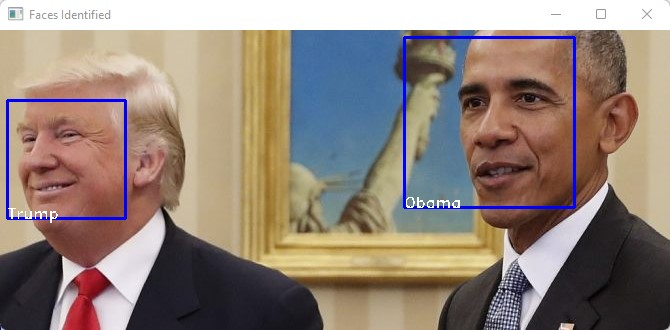

## 9.Face recognition using Fisherface Method with Haar cascade Detector (prediction - success!)

### In this chapter we are trying to predict image of the President Joe Biden and President George W. Bush by using training data. 

#### Fisherface is one of the popular algorithms used in face recognition, and is widely believed to be superior to other techniques, because of the effort to maximize the separation between classes in the training process.

Once the FisherfacesModel is defined, it can be used to learn the Fisherfaces and generate predictions.

In this chapter we use the Viola-Jones Face Detection Technique, popularly known as Haar Cascades. It is an Object Detection Algorithm used to identify faces in an image or a real time video. The algorithm uses edge or line detection features. It is still found to be used almost everywhere. It has fully trained models available at the OpenCV GitHub repository: https://github.com/opencv/opencv/tree/master/data/haarcascades.

## Dataset includes 2 folders:

## 1	Training (contains 2 more folders) - which we will use for training model:

### 1st folder: Biden (10 pictures of Joe Biden)

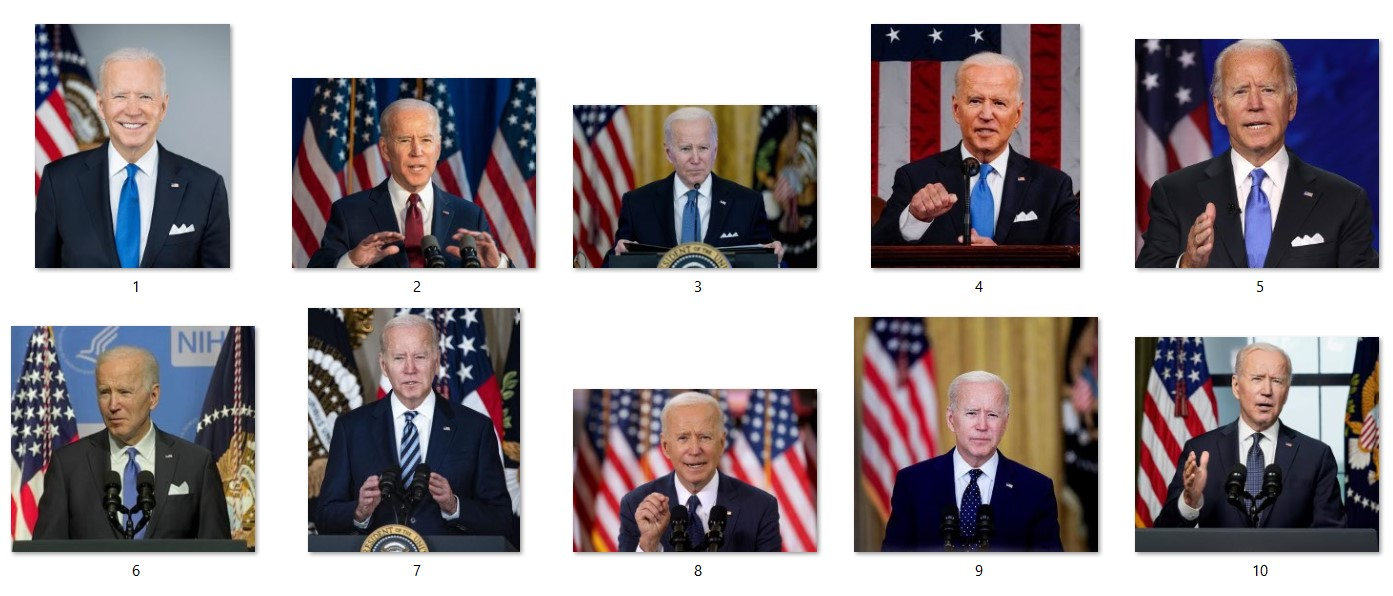


### 2nd folder: Bush (10 pictures of George W. Bush)

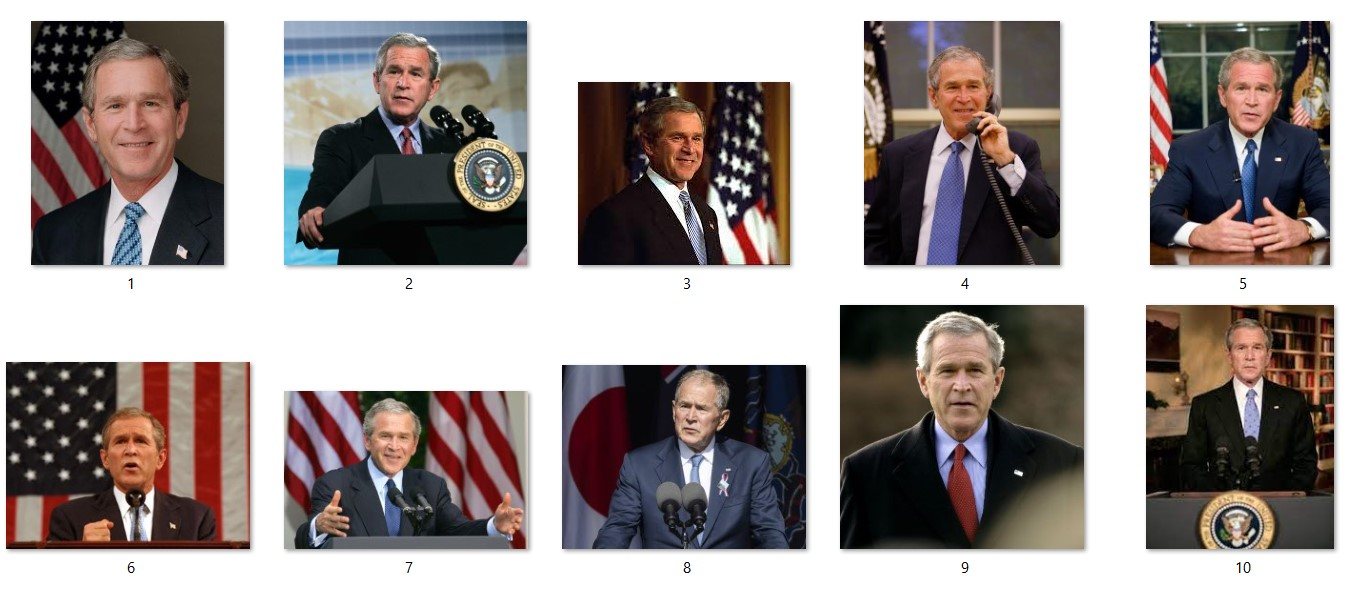


## 2	Testing (contains 2 pictures) - for testing the training model: 

### 1.	Joe1.jpg

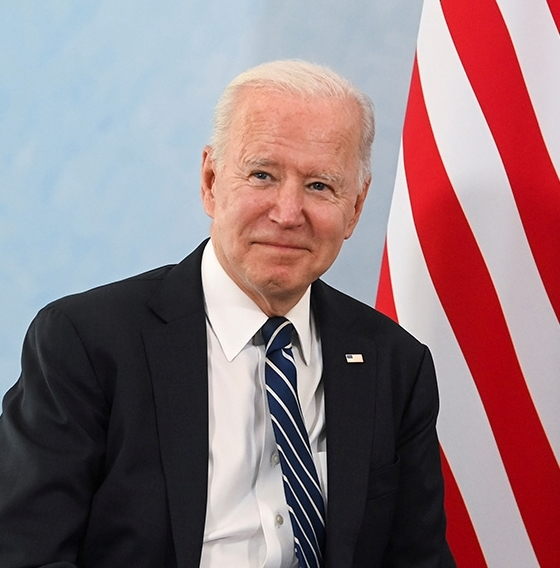


### 2.	Bush1.jpg

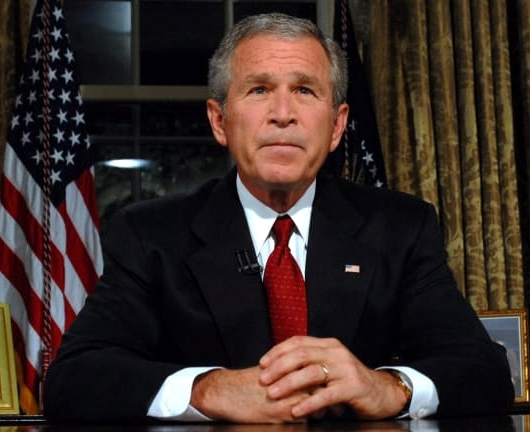

## After the training is done, the next stage is image recognition process.

# Testing picture nr 1 - President Joe Biden

In [1]:
#import the required libraries
import cv2
import numpy as np
import os
from sys import exit


# function to detect face from image
def face_detection(image_to_detect):
    #converting the image to grayscale since its required for fisher faces
    image_to_detect_gray = cv2.cvtColor(image_to_detect, cv2.COLOR_BGR2GRAY)
    
    # load the pretrained model for face detection
    # haarcascade is recommended for Fisherface haarcascade_frontalface_default.xml
    face_detection_classifier = cv2.CascadeClassifier('Bootcamp final project/HCModel/haarcascade_frontalface_default.xml')
    
    # detect all face locations in the image using classifier
    all_face_locations = face_detection_classifier.detectMultiScale(image_to_detect_gray)
    
    # if no faces are detected
    if (len(all_face_locations) == 0):
        return None, None
    
    #splitting the tuple to get four face positions
    x,y,width,height = all_face_locations[0]
    
    #calculating face coordinates
    face_coordinates = image_to_detect_gray[y:y+width, x:x+height]
    
    #training and testing images should be of same size for fisher faces
    face_coordinates = cv2.resize(face_coordinates,(500,500))
    
    #return the face detected and face location
    return face_coordinates, all_face_locations[0]


# function to prepare training data
def prepare_training_data(images_dir, label_index):
    
    #list to hold all the faces and label indexes
    faces_coordinates = []
    labels_index = []
    
    #get the image names from the given directory
    images = os.listdir(images_dir)
    
    for image in images:
        image_path = images_dir + "/" + image
        training_image = cv2.imread(image_path)
        #display the current image taken for training
        cv2.imshow("Training in progress for "+names[label_index], cv2.resize(training_image,(500,500)))
        cv2.waitKey(100)
        
        #detect face using the method for detection
        face_coordinates, box_coordinates = face_detection(training_image)
        
        if face_coordinates is not None:
            # add the returned face to the list of faces
            faces_coordinates.append(face_coordinates)
            labels_index.append(label_index)
    
    return faces_coordinates, labels_index

# preprocessing #
names = []

names.append("George W. Bush")
face_coordinates_bush, labels_index_bush = prepare_training_data("Bootcamp final project/images/dataset/training/Bush",0)
    
names.append("Joe Biden")
face_coordinates_biden, labels_index_biden = prepare_training_data("Bootcamp final project/images/dataset/training/Biden",1)
    
face_coordinates = face_coordinates_bush + face_coordinates_biden
labels_index = labels_index_bush + labels_index_biden

#print total number of faces and names
print("Total faces:", len(face_coordinates))
print("Total names:", len(names))


# training #

#create the instance of face recognizer
face_classifier = cv2.face.FisherFaceRecognizer_create()

face_classifier.train(face_coordinates,np.array(labels_index))


# prediction #

image_to_classify = cv2.imread("Bootcamp final project/images/dataset/testing/joe1.jpg")

#make a copy of the image
image_to_classify_copy = image_to_classify.copy()

#get the face from the image
face_coordinates_classify, box_locations = face_detection(image_to_classify_copy)  

#if no faces are returned
if face_coordinates_classify is None:
    print("There are no faces in the image to classify")
    exit()
    
#if not none, we have predict the face
name_index, distance = face_classifier.predict(face_coordinates_classify)
name = names[name_index]
distance = abs(distance)

#draw bounding box and text for the face detected
(x,y,w,h) = box_locations
cv2.rectangle(image_to_classify,(x,y),(x+w, y+h),(0,255,0),2)
cv2.putText(image_to_classify,name,(x,y-5),cv2.FONT_HERSHEY_PLAIN,2.5,(0,255,0),2)

#show the image in window
cv2.imshow("Prediction "+name, cv2.resize(image_to_classify, (500,500)))
cv2.waitKey(0)
cv2.destroyAllWindows()

Total faces: 20
Total names: 2


## Prediction result - success!
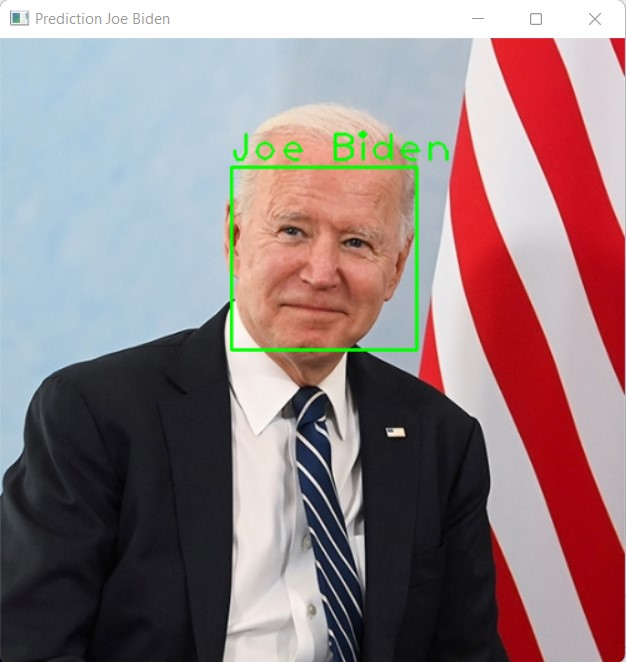

# Testing picture nr 2 - President George W. Bush

In [1]:
#import the required libraries
import cv2
import numpy as np
import os
from sys import exit


# function to detect face from image
def face_detection(image_to_detect):
    #converting the image to grayscale since its required for fisher faces
    image_to_detect_gray = cv2.cvtColor(image_to_detect, cv2.COLOR_BGR2GRAY)
    
    # load the pretrained model for face detection
    # haarcascade is recommended for Fisherface haarcascade_frontalface_default.xml
    face_detection_classifier = cv2.CascadeClassifier('Bootcamp final project/HCModel/haarcascade_frontalface_default.xml')
    
    # detect all face locations in the image using classifier
    all_face_locations = face_detection_classifier.detectMultiScale(image_to_detect_gray)
    
    # if no faces are detected
    if (len(all_face_locations) == 0):
        return None, None
    
    #splitting the tuple to get four face positions
    x,y,width,height = all_face_locations[0]
    
    #calculating face coordinates
    face_coordinates = image_to_detect_gray[y:y+width, x:x+height]
    
    #training and testing images should be of same size for fisher faces
    face_coordinates = cv2.resize(face_coordinates,(500,500))
    
    #return the face detected and face location
    return face_coordinates, all_face_locations[0]


# function to prepare training data
def prepare_training_data(images_dir, label_index):
    
    #list to hold all the faces and label indexes
    faces_coordinates = []
    labels_index = []
    
    #get the image names from the given directory
    images = os.listdir(images_dir)
    
    for image in images:
        image_path = images_dir + "/" + image
        training_image = cv2.imread(image_path)
        #display the current image taken for training
        cv2.imshow("Training in progress for "+names[label_index], cv2.resize(training_image,(500,500)))
        cv2.waitKey(100)
        
        #detect face using the method for detection
        face_coordinates, box_coordinates = face_detection(training_image)
        
        if face_coordinates is not None:
            # add the returned face to the list of faces
            faces_coordinates.append(face_coordinates)
            labels_index.append(label_index)
    
    return faces_coordinates, labels_index

# preprocessing #
names = []

names.append("George W. Bush")
face_coordinates_bush, labels_index_bush = prepare_training_data("Bootcamp final project/images/dataset/training/Bush",0)
    
names.append("Joe Biden")
face_coordinates_biden, labels_index_biden = prepare_training_data("Bootcamp final project/images/dataset/training/Biden",1)
    
face_coordinates = face_coordinates_bush + face_coordinates_biden
labels_index = labels_index_bush + labels_index_biden

#print total number of faces and names
print("Total faces:", len(face_coordinates))
print("Total names:", len(names))


# training #

#create the instance of face recognizer
face_classifier = cv2.face.FisherFaceRecognizer_create()

face_classifier.train(face_coordinates,np.array(labels_index))


# prediction #

image_to_classify = cv2.imread("Bootcamp final project/images/dataset/testing/bush1.jpg")

#make a copy of the image
image_to_classify_copy = image_to_classify.copy()

#get the face from the image
face_coordinates_classify, box_locations = face_detection(image_to_classify_copy)  

#if no faces are returned
if face_coordinates_classify is None:
    print("There are no faces in the image to classify")
    exit()
    
#if not none, we have predict the face
name_index, distance = face_classifier.predict(face_coordinates_classify)
name = names[name_index]
distance = abs(distance)

#draw bounding box and text for the face detected
(x,y,w,h) = box_locations
cv2.rectangle(image_to_classify,(x,y),(x+w, y+h),(0,255,0),2)
cv2.putText(image_to_classify,name,(x,y-5),cv2.FONT_HERSHEY_PLAIN,2.5,(0,255,0),2)

#show the image in window
cv2.imshow("Prediction "+name, cv2.resize(image_to_classify, (500,500)))
cv2.waitKey(0)
cv2.destroyAllWindows()

Total faces: 20
Total names: 2


## Prediction result - success!:
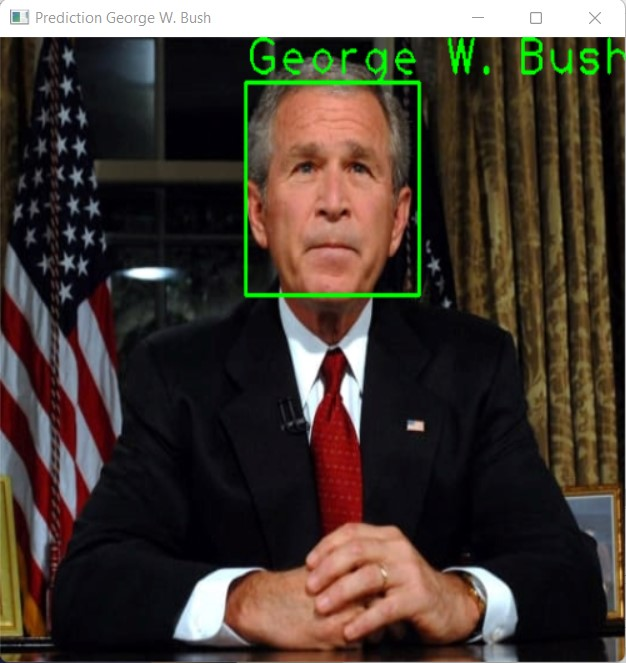

## 10.Summary

### Project completed successfully. 

* **HoG Face Detector is very fast, but picture should be almost front-faced.**

* **CNN based Face Detector is both highly accurate and very smart, capable of detecting faces from varying viewing angles, lighting conditions, and occlusion.**

* **Fisherface Method with Haar cascade Detector - In our test, the testing images used are not the same as the training images used during the training. The results show that the system successfully (correctly) identified the test images.**

## 11.References

* Hadelin de Ponteves, Sztuczna inteligencja. Błyskawiczne wprowadzenie do uczenia maszynowego, uczenia ze wzmocnieniem i uczenia głębokiego, Wydawnictwo Helion S.A Warszawa 2021

* David Foster, Deep learning i modelowanie generatywne. Jak nauczyć komputer malowania, pisania, komponowania i grania, Wydawnictwo Helion S.A Warszawa 2021

* Mustamin Anggo and La Arapu, Face Recognition Using Fisherface Method, Journal of Physics: Conference Series, https://iopscience.iop.org/article/10.1088/1742-6596/1028/1/012119/pdf

* https://www.techtarget.com/searchenterpriseai/definition/face-detection

* https://www.facefirst.com/blog/face-detection-vs-face-recognition

* https://pyimagesearch.com/2021/04/19/face-detection-with-dlib-hog-and-cnn

* https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/

* https://towardsdatascience.com/face-detection-with-haar-cascade-727f68dafd08

* https://iq.opengenus.org/face-recognition-using-fisherfaces/
